In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = ['comp.graphics', 'sci.space', 'rec.sport.baseball', 'talk.politics.misc', 'misc.forsale']
train = fetch_20newsgroups(subset='train', categories = categories)
test = fetch_20newsgroups(subset='test', categories = categories)

In [5]:
print(train.data[0])

From: sugarman@ra.cs.umb.edu (Steven R. Garman)
Subject: WANTED - Optical Shaft Encoders for Telescope
Nntp-Posting-Host: ra.cs.umb.edu
Organization: University of Massachusetts at Boston
Lines: 23


[Also posted in misc.forsale.wanted,misc.wanted,ne.wanted,ny.wanted,nj.wanted]

WANTED:  Optical Shaft Encoders

Quantity 2
Single-ended
Incremental

Needed to encode the movements of a 16" Cassegrain telescope.  The telescope
is in the observatory of the Univ. of Mass. at Boston.  The project is being
managed by Mr. George Tucker, a graduate student at UMB.  Please call him, or
email/call me, if you have one or two of the specified type of encoder.  Of
course, due to our low funding level we are looking for a price that is
sufficiently lower than that given for new encoders.  :)

George Tucker
617-965-3408

ME:
-- 
sugarman@cs.umb.edu | 6172876077 univ | 6177313637 home | Standard Disclaimer
Boston Massachusetts USA



In [6]:
train.target[0]

3

In [8]:
train.target_names

['comp.graphics',
 'misc.forsale',
 'rec.sport.baseball',
 'sci.space',
 'talk.politics.misc']

In [9]:
print(test.data[17])

From: imagesyz@aol.com
Subject: WANNA SCAN 24-BIT COLR PICTURE?
Organization: UTexas Mail-to-News Gateway
Lines: 2
NNTP-Posting-Host: cs.utexas.edu

My 24-bit color 600 dpi fladbed scanner can do the job for you. GIF, TIFF,
PCX, BMP. Interested? Please write to me: imagesyz@aol.com



In [10]:
print(test.target[17])

0


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [12]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [13]:
labels

array([2, 0, 2, ..., 3, 0, 4], dtype=int64)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test.target, labels))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       389
           1       0.98      0.90      0.94       390
           2       0.91      0.98      0.94       397
           3       0.86      0.97      0.91       394
           4       0.98      0.87      0.92       310

    accuracy                           0.93      1880
   macro avg       0.93      0.93      0.93      1880
weighted avg       0.93      0.93      0.93      1880



In [16]:
print(confusion_matrix(test.target, labels))

[[346   2  14  25   2]
 [ 14 352  15   9   0]
 [  0   3 391   3   0]
 [  5   1   1 384   3]
 [  1   0  11  27 271]]


In [20]:
def predict_category(s, train=train, model=model):
    pred= model.predict([s])
    print(pred)
    return train.target_names[pred[0]]

In [21]:
print(predict_category("I have an old CRT monitor with 300 dpi resolution"))

[1]
misc.forsale


In [22]:
print(predict_category("Sachin scored a double hundred today"))

[2]
rec.sport.baseball


In [ ]:
print(predict_category(""))

## Area Visualization

In [23]:
import matplotlib.pyplot as plt

In [29]:
from sklearn.naive_bayes import GaussianNB

In [31]:
import numpy as np

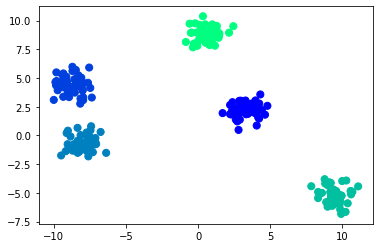

In [42]:
from sklearn.datasets import make_blobs
x, y = make_blobs(250, 2, centers =5, cluster_std=0.7)
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='winter')

In [43]:
model = GaussianNB()
model.fit(x,y)

GaussianNB()

In [46]:
rng = np.random.RandomState(5)
Xnew = [-10, -10] +[14, 18] * rng.rand(2000,2)
ynew = model.predict(Xnew)

(-11.059554495125305,
 12.156896828184955,
 -7.689390723557827,
 11.237687146381464)

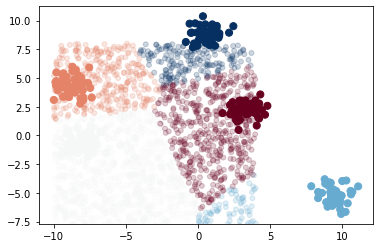

In [47]:
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=25, cmap='RdBu', alpha = 0.2)
plt.axis(lim)

Advantages:

1. Its simple to use and calculate 
2. Low computational cost
3. Works really well on large datasets
4. It performs well with discrete/continuous data
5. Its pretty accurate during multi-classification task especially with Text analysis

Disadvantages:

1. The assumption of independence of features is usually not possible in real datasets
2. If there is no training data for particular outcome scenario this causes zero probability posterior